In [179]:
# 綜合圖型辨識
import numpy as np
from keras.datasets import cifar10
import otherLib as olib
np.random.seed(10) #fix random result

In [180]:
# 載入其他函式庫
import otherLib as olib
olib.solve_cudnn_error() # 處理 GPN memory 分配

1 Physical GPUs, 1 Logical GPUs


In [181]:
# 下載資料集
(x_train_image, y_train_label), (x_test_image,  y_test_label) = cifar10.load_data()

In [182]:
# 影像集大小
print('x_train_image', x_train_image.shape) # > x_train_image (數量, 寬, 高, rgb)
print('y_train_label', y_train_label.shape) # > y_train_label (數量,)

x_train_image (50000, 32, 32, 3)
y_train_label (50000, 1)


In [183]:
# 標示 label 意義
label_dict = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "trunk"
}

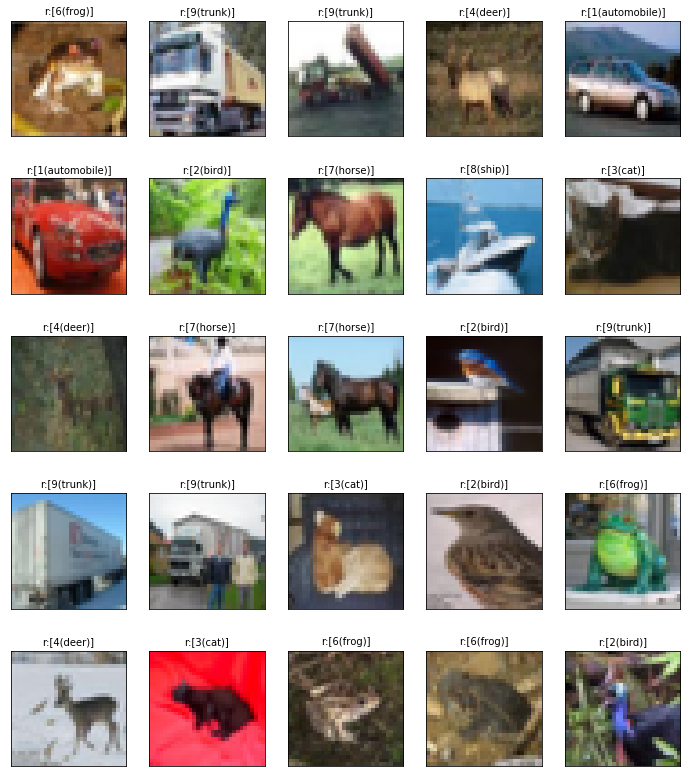

In [184]:
# 查看第一筆影像
olib.plot_prediction(x_train_image, y_train_label, [], 0, dict = label_dict)

In [185]:
# 圖片標準化
x_train_image_normalize = x_train_image.astype('float32') / 255.0
x_test_image_normalize = x_test_image.astype('float32') / 255.0

In [186]:
# 查看圖片標準化前後
print(x_train_image[0][0][0])
print(x_train_image_normalize[0][0][0])

[59 62 63]
[0.23137255 0.24313726 0.24705882]


In [187]:
# 將標籤做成 One-hot encoding
from keras.utils import np_utils
y_train_oneHot = np_utils.to_categorical(y_train_label)
y_test_oneHot  = np_utils.to_categorical(y_test_label) 

In [188]:
# 建立 CNN 模型
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
model = Sequential()

In [189]:
# 建立捲積層
# filters: filters 數量 (32)))
# kernel_size: filters 大小(3*3)
# padding: same(補齊周圍，捲積後大小不變)
# input_shape: 輸入層大小 (32*32*1)
# activation: 線性
model.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    padding = 'same',
    input_shape = (32, 32, 3),
    activation = 'relu'
))

In [190]:
# 建立 Dropout
# 隨機放棄 30% 捲積結果
model.add(Dropout(0.3))

In [191]:
# 建立池化層
# pool_size: 池化層大小 (3*3)
model.add(MaxPooling2D(
    pool_size = (3,3)
))

In [192]:
# 建立捲積層 2
model.add(Conv2D(
    filters = 64,
    kernel_size = (3,3),
    padding = 'same',
    activation = 'relu'
))

In [193]:
# 建立 Dropout 2 
model.add(Dropout(0.3))

In [194]:
# 建立池化層 2
model.add(MaxPooling2D(
    pool_size = (3,3)
))

In [195]:
# 建立捲積層 3
model.add(Conv2D(
    filters = 128,
    kernel_size = (3,3),
    padding = 'same',
    activation = 'relu'
))

In [196]:
# 建立 Dropout 3
model.add(Dropout(0.3))

In [197]:
# 建立池化層 3
model.add(MaxPooling2D(
    pool_size = (3,3)
))

In [198]:
# 建立平坦層
# 建立 Dropout 4
model.add(Flatten())
model.add(Dropout(0.3))

In [199]:
# 建立隱藏層
# units: 1024 層
# activation: 線性函數
model.add(Dense(
    units = 1024,
    activation = 'relu'
))
model.add(Dropout(0.25))

In [200]:
# 建立輸出層
# units: 10 層
# activation: softmax機率向量
model.add(Dense(
    units = 10,
    activation = 'softmax'
))

In [201]:
# 顯示剛建立之模型
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_23 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
dropout_24 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 3, 3, 128)        

In [202]:
# 定義訓練方法
# loss: categorical_crossentropy 交叉熵
# optimizer: adam
# metrics: accuracy 準確率
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [203]:
# 開始訓練
# x,y: 輸入值
# validation_split: 0.2 資料作驗證； 0.8做訓練
# epochs: 50 次
# batch_size: 300 筆
train_history = model.fit(
    x = x_train_image_normalize,
    y = y_train_oneHot,
    validation_split = 0.2,
    epochs = 50,
    batch_size = 128
)
# loss, accuracy: 訓練資料(0.8)的 loss 與準確度
# val_loss, val_accuracy: 驗證資料(0.2)的 loss 與準確度

Epoch 1/50
313/313 [==============================] - 2s 8ms/step - accuracy: 0.3451 - loss: 1.7507 - val_loss: 1.7370 - val_accuracy: 0.3948
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - accuracy: 0.4824 - loss: 1.4141 - val_loss: 1.4679 - val_accuracy: 0.5180
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - accuracy: 0.5364 - loss: 1.2817 - val_loss: 1.4662 - val_accuracy: 0.5181
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - accuracy: 0.5677 - loss: 1.2072 - val_loss: 1.3559 - val_accuracy: 0.5442
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - accuracy: 0.5929 - loss: 1.1411 - val_loss: 1.3367 - val_accuracy: 0.5322
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - accuracy: 0.6106 - loss: 1.0926 - val_loss: 1.2265 - val_accuracy: 0.5873
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - accuracy: 0.6301 - loss: 1.0456 - val_loss: 1.1279 - val_accuracy: 0.6094
Epoch 

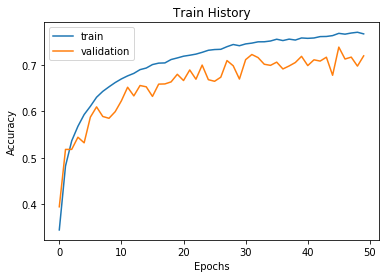

In [204]:
# 畫圖 
olib.show_train_history(train_history)

In [205]:
# 預測準確度
scores = model.evaluate(x_test_image_normalize, y_test_oneHot)
print('accuracy=', scores[1])

313/313 [==============================] - 1s 2ms/step - accuracy: 0.7121 - loss: 0.8708
accuracy= 0.7121000289916992


In [206]:
# 預測值
prediction = np.argmax(model.predict(x_test_image_normalize), axis=-1)
prediction

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [207]:
# 建立混淆矩陣
import pandas as pd
pd.crosstab(
    y_test_label.reshape(-1),
    prediction,
    rownames = ['label'],
    colnames = ['prediction']
)

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,679,6,45,54,58,3,16,5,117,17
1,13,749,3,21,16,5,29,1,71,92
2,35,0,521,123,156,41,104,7,11,2
3,4,0,25,706,97,69,82,5,7,5
4,2,0,19,83,823,7,47,11,8,0
5,5,0,27,311,74,533,32,10,7,1
6,2,0,12,75,37,11,860,0,2,1
7,8,0,18,117,229,37,12,570,4,5
8,29,8,4,45,15,2,12,0,877,8


In [208]:
# 查看被混淆的值為哪幾筆 (實際2 預測3)
df = pd.DataFrame({
    'label': y_test_label.reshape(-1),
    'prediction': prediction
})
df[(df.label == 2 ) & (df.prediction == 3)]

,label,prediction
35,2,3
70,2,3
149,2,3
183,2,3
266,2,3
354,2,3
357,2,3
388,2,3
409,2,3
430,2,3


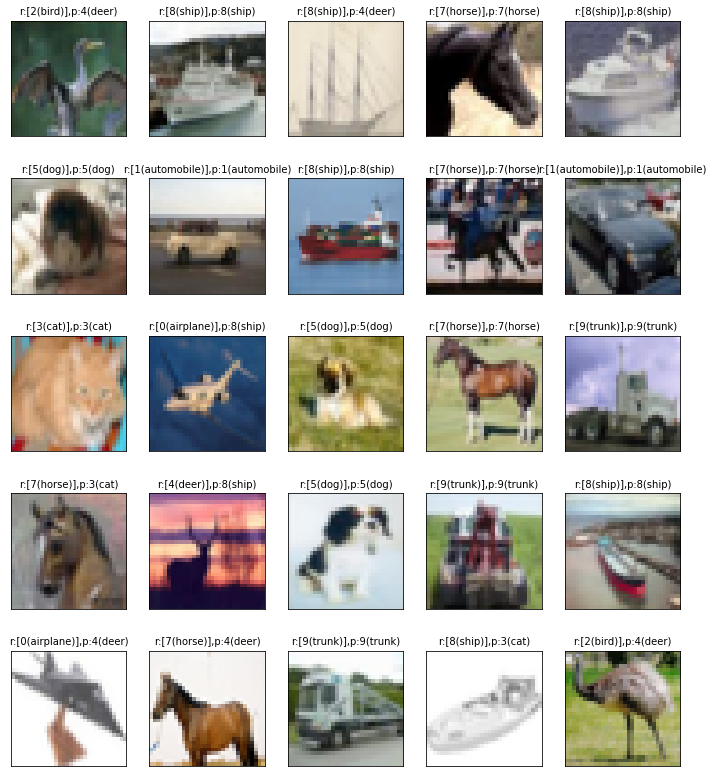

In [209]:
# 查看被混淆的圖片有多醜
olib.plot_prediction(x_test_image, y_test_label, prediction, idx=195, dict = label_dict)

label: cat
prediction: cat


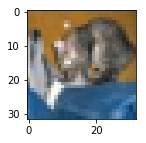

airplane Probability:0.010410614
automobile Probability:0.006465041
bird Probability:0.008165718
cat Probability:0.776690304
deer Probability:0.014126685
dog Probability:0.084776342
frog Probability:0.082156859
horse Probability:0.004036502
ship Probability:0.010425706
trunk Probability:0.002746272


In [210]:
# 顯示某項預測機率
predicted_probability = model.predict(x_test_image_normalize)
olib.show_Predicted_Probability(y_test_label, prediction, x_test_image, predicted_probability, 0, label_dict)

In [218]:
# 儲存本次測試結果
model.save("saveModel/Cifar")
print("Save model to disk")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saveModel/Cifar\assets
Save model to disk
